# Build a predictive model of employee attrition on python

   ## Exploratory Data Analysis

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset for analysis

In [3]:
data = pd.read_csv(r"C:\Users\HP\Downloads\capston project\employee attrition dataset.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# checking the number of row and columns from the dataset
data.shape

(1470, 35)

In [5]:
# checking the data types in the dataset
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
#summarizing the data

data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# checking the null values/missing values
data.isnull().sum() # null values are not present in the data

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
# checking dublicate values in the dataset : 
# no duplicate values present in the data set
data[data.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


## 1. Finding the no of employees attrited

In [11]:
# count of employee attrition 

Attrition_count = pd.DataFrame(data['Attrition'].value_counts())
Attrition_count

,Attrition
No,1233
Yes,237


([<matplotlib.patches.Wedge at 0x219e459c040>,
 [Text(-1.136781068348268, 0.6306574368426737, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')])

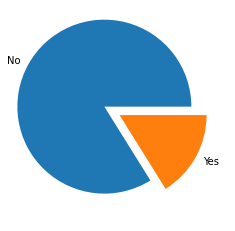

In [12]:
# creating a pie chart to see the Attrition count in percentages

plt.pie(Attrition_count['Attrition'],labels=['No','Yes'],explode = (0.2,0))

# Major of employee are not attrited = 1233
# 237 employee are attrited

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition', ylabel='count'>

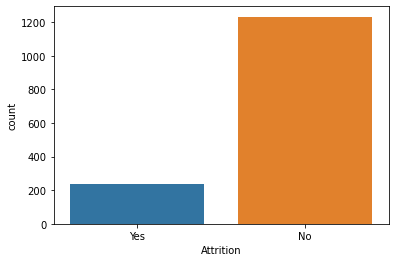

In [13]:
sns.countplot(data.Attrition) # find count of employee attrition using countplot

In [14]:
# data of attrition says that the more is of 'No' values and less no of 'yes'
# it can be seen that there is big difference in counts of the values so we can say that data is 'imbalanced'

## 2. Finding the correlation between features

In [15]:
# creating correlation matrix

df = data.corr()
df

# positive corr : is the one variable increases other variable is also increases
# negative corr : is the one variable is increases but other variable is decreases 
# no co-relation : is the no existing relation between the two variable

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


[]

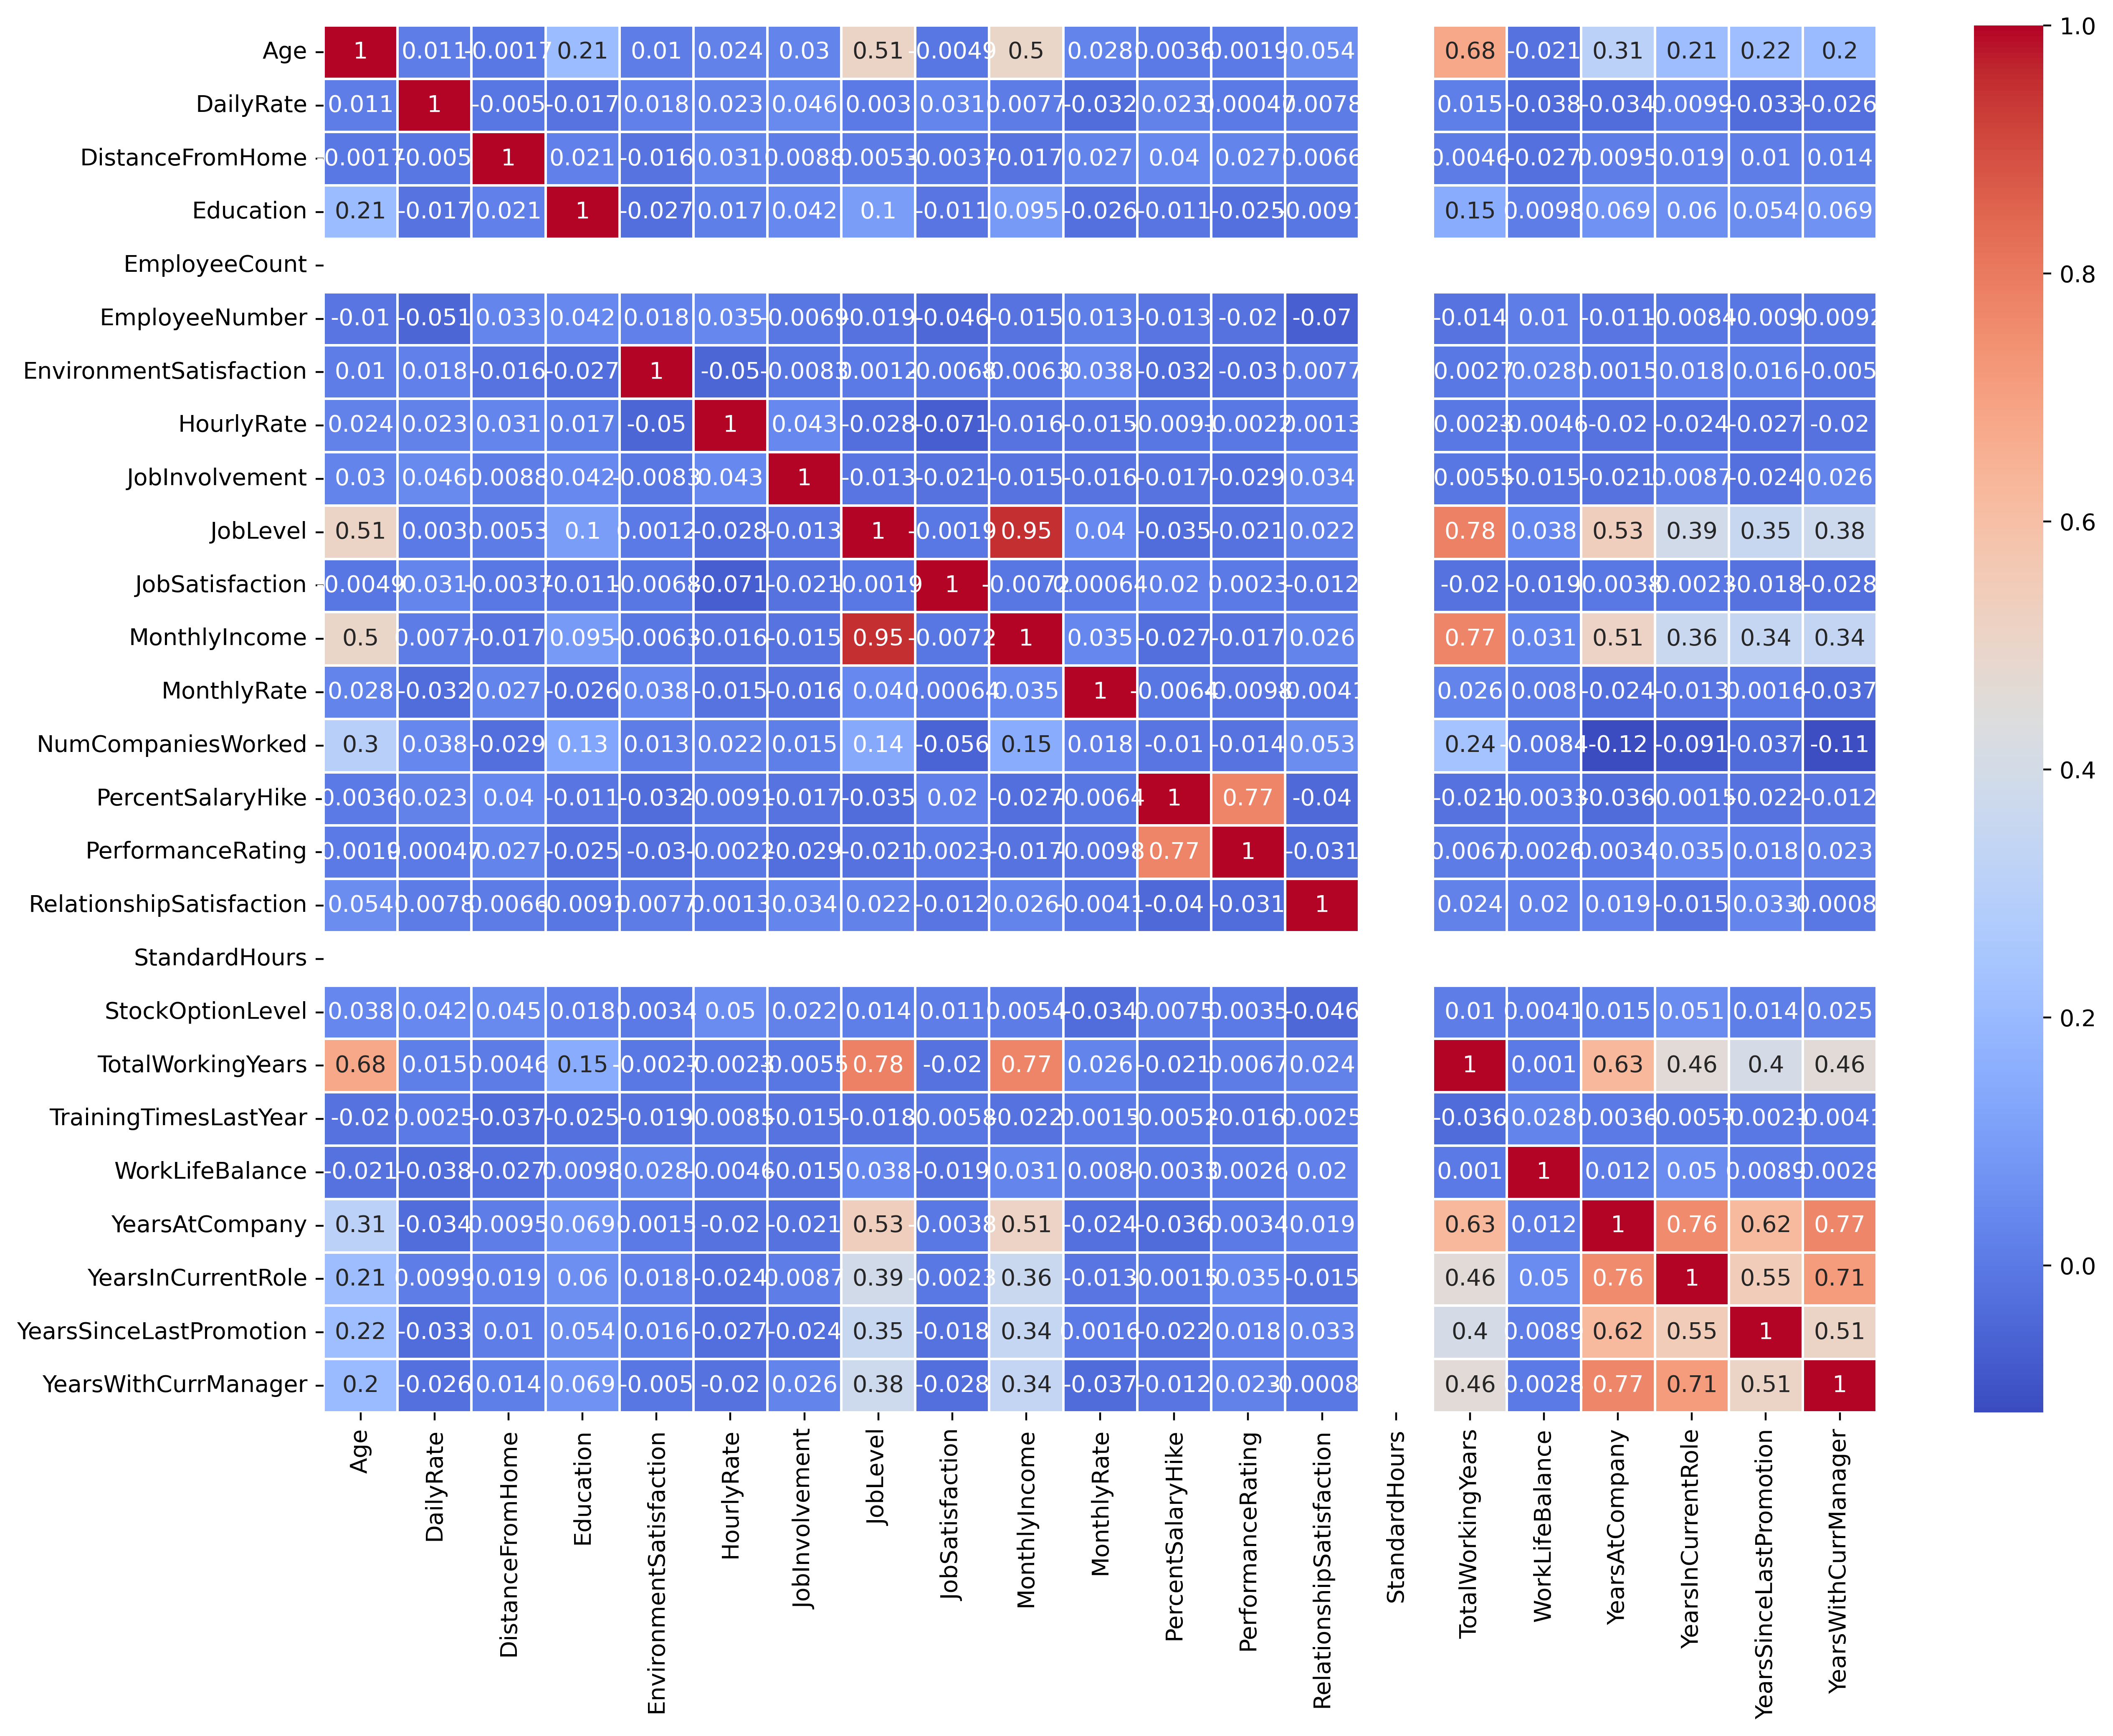

In [16]:
# Data visualisation corelation using heatmap

plt.figure(figsize=(15,11),dpi=400)
df1 = df.drop(columns=['StockOptionLevel','NumCompaniesWorked','EmployeeNumber','TrainingTimesLastYear','EmployeeCount'])
sns.heatmap(df1,linewidth=1,cmap='coolwarm',annot = True)
plt.plot()

In [17]:
# droping the usless data
data = data.drop(columns=['EmployeeCount','EmployeeNumber'],axis=1)
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0


## 3. Finding the number of male and female attrition

In [18]:
fc1 = data['Gender'] == 'Male'
fc2 = data['Attrition'] == 'Yes'
print('Number of Attrition in case of Male :', data[fc1 & fc2].shape[0])

Number of Attrition in case of Male : 150


In [19]:
fc3 = data['Gender'] == 'Female'
fc4 = data['Attrition'] == 'Yes'
print('Number of Attrition in case of Female :', data[fc3 & fc4].shape[0])

Number of Attrition in case of Female : 87


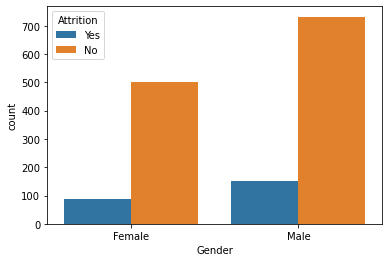

In [20]:
sns.countplot(hue=data.Attrition,x=data.Gender)
plt.show()

In [21]:
#In the given data, the number of male attrition is more than the female attrition

## 4. Impact of Business Travel on Attrition

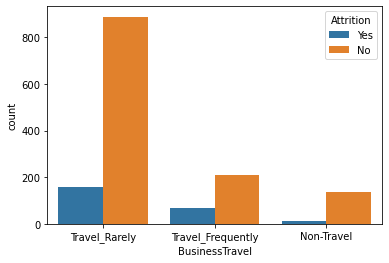

In [22]:
# 4. Impact of business travel on Attrition

sns.countplot(hue=data.Attrition,x=data.BusinessTravel)
plt.show()

In [23]:
# Graph tell us that company has more count or more no.of employee who travel rarely.it means travel rate of company is less
# there are more employee which travel rarely and are not satisfied with their job
# Non traveller has a least count as well as least attrition

## 5. Impact of Department on Attrition

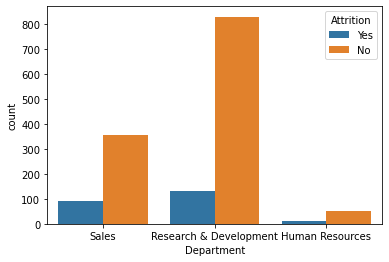

In [24]:
sns.countplot(hue=data.Attrition,x=data.Department)
plt.show()

In [25]:
# There are 3 department : sales, R&D , Human Resources
# R&D department has more no of Attrition(150 employees) as compared to other departments
# HR department has least Attrition aproxx 5 to 10 employee

## 6. Impact of Education Field on Attrition

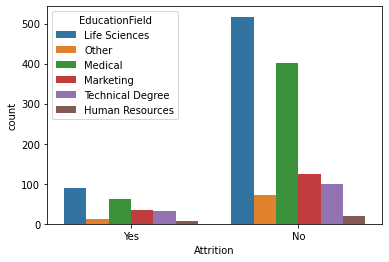

In [26]:
sns.countplot(hue=data.EducationField,x=data.Attrition)
plt.show()

In [27]:
# The employees from life science and medical education field are having more number than other educational field
# HR educational field epmloyess has least attrition than the others

## 7. Impacts of Gender on Attrition

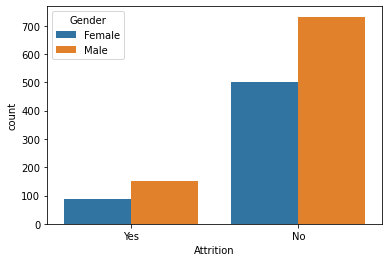

In [28]:
sns.countplot(hue=data.Gender,x=data.Attrition)
plt.show()

In [29]:
# as we can see in the graph the attrition rate in case of female is less than male attrition
# We can say that the more are the male employees are not satisfy with their job.

# 8. Impacts of Overtime on Attrition 

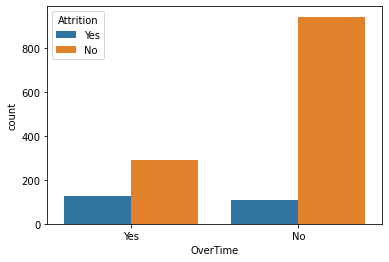

In [30]:
sns.countplot(hue=data.Attrition,x=data.OverTime)
plt.show()

In [31]:
# In the graph there is slight change in the Attrition Yes and Attrition no
# there will be no impact on the Attrition due to overtime 
# most of the employees are not doing the obver time

## 9. Impact of Job Role on the Attrition

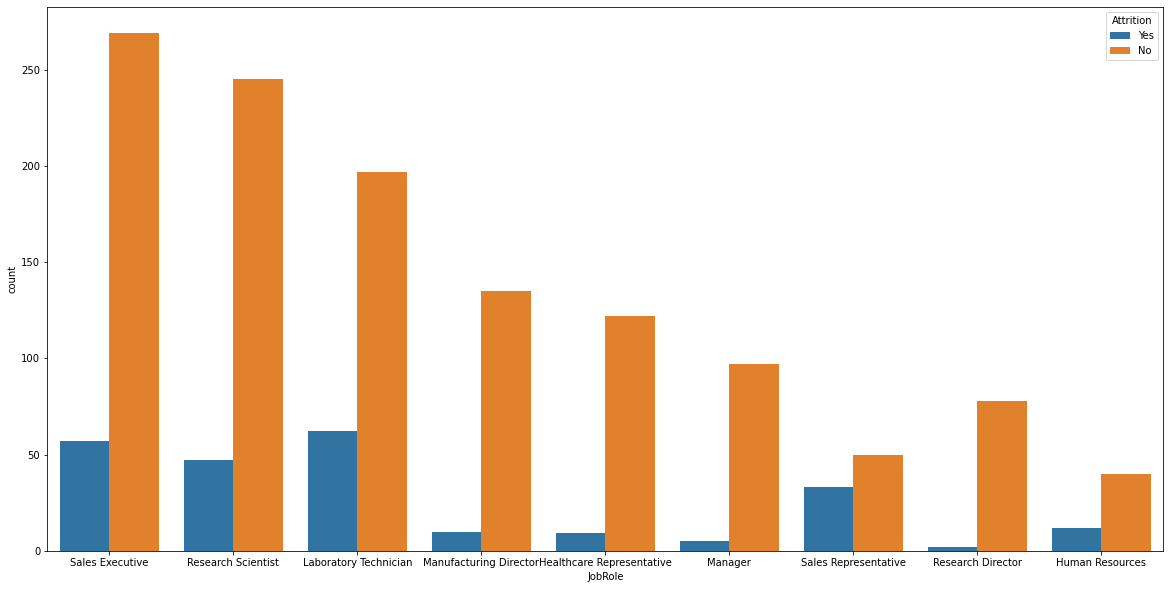

In [32]:
plt.figure(figsize=(20,10), facecolor = 'white')
sns.countplot(hue=data.Attrition,x=data.JobRole)
plt.xlabel('JobRole', fontsize=10)
plt.show()

In [33]:
# as the graph shows, the job role is not impacting the Attrition 
# laboratory tech and sales executive  semms to high in Attrition

# Analysis on contineous data with respect to target column (Attrition)

In [34]:
numerical_col = []
for column in data.columns:
    if data[column].dtypes == 'int64' and len(data[column].unique())>= 10:
        
        numerical_col.append(column)

In [35]:
numerical_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

## 1. Impact of Age on Attrition

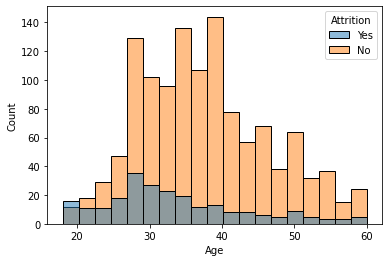

In [36]:
sns.histplot(hue=data.Attrition,x=data.Age)
plt.show()

In [37]:
# employee between the age 25 to 35 are leaving job highly
# employee having high age,in this case the percentageo of leaving the job very less

## 2. Impact of Distance from home on Attrition

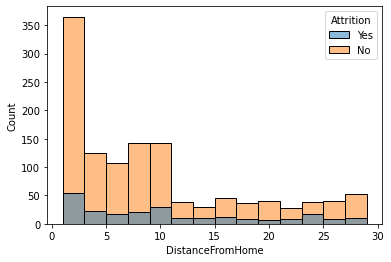

In [38]:
sns.histplot(hue=data.Attrition,x=data.DistanceFromHome)
plt.show()

In [39]:
# it seems that the distance between 0 to 10, more employees are attrited
# as the long distace less will be the employee attrition 
# Surprisingly, the employees having the distance range between the 13 to 28 from home to office they are not leaving the job.

## 3. How Monthly income impact on Attrition 

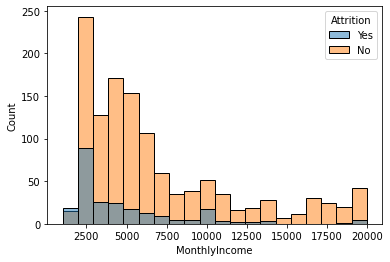

In [40]:
sns.histplot(hue=data.Attrition,x=data.MonthlyIncome)
plt.show()

In [41]:
# the employees having monthly income between 2000 to 10000, they are leaving the job more in cases
# the employe having the income between 11000 to 20000, seems that Attrition is less
# We can say that the more is salary, less the attrition.

## 4. Impact of No of companies worked on Attrition

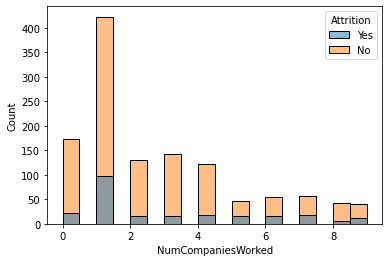

In [42]:
sns.histplot(hue=data.Attrition,x=data.NumCompaniesWorked)
plt.show()

In [43]:
# as per the histogram shows, the employee worked in 1 to 2 companies they are leaving the job
# and the employee worked in more then 2 to 8 companies,less attrition rate is find.

##  5. Impact of salary hike Attrition 

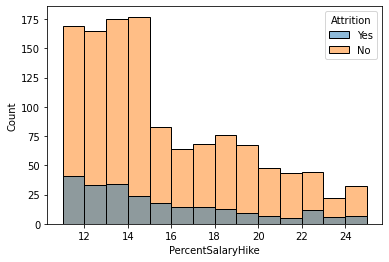

In [44]:
sns.histplot(hue=data.Attrition,x=data.PercentSalaryHike)
plt.show()

In [45]:
# the emloyee having salary hike percent betweeb 10 to 16,more is employee attrition
# incase of 18 to 26 percent salary hike, less attrtion is there
# We can say that, more is the salary hike less will be the attrition.

## 6. Years at the company

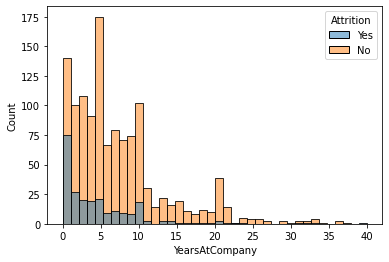

In [46]:
sns.histplot(hue=data.Attrition,x=data.YearsAtCompany)
plt.show()

In [47]:
# higher is the years at the company,more is in attrition
# lower is the years at company,lesser is attrtion
# it seems that the years at company between 0 to 10,in this case more is Attrtion

In [48]:
discrete_col = []

for column in data.columns:
    if data[column].dtype == 'int64' and len(data[column].unique()) <= 10:
     discrete_col.append(column) 

In [49]:
discrete_col

['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

# Analysis on Discrete data with respect to target column (Attrition)

## 1. Impact of Environment Satisfaction and job satisfaction on Attrition

<function matplotlib.pyplot.show(close=None, block=None)>

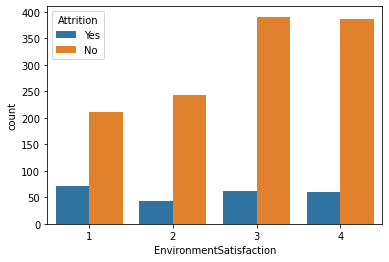

In [50]:
sns.countplot(hue=data.Attrition,x=data.EnvironmentSatisfaction)
plt.show

In [51]:
# increase in rate of EnvironmentSatisfaction and job satisfaction lesser the Attrition

## 2. Impact of Job Level on Attrition

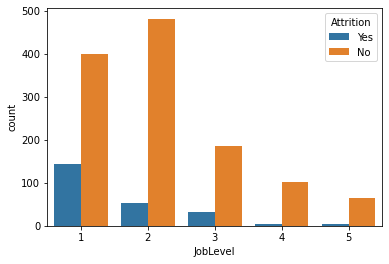

In [52]:
sns.countplot(hue=data.Attrition,x=data.JobLevel)
plt.show()

In [53]:
# increase in the level of job more the Attrition

## 3.Impact of Job Involvement on Attrition

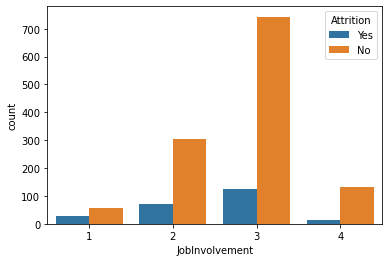

In [54]:
sns.countplot(hue=data.Attrition,x=data.JobInvolvement)
plt.show()

In [55]:
# If more in job involvement more is the Attrition

## 4. Impact of Stock Option level on Attrition 

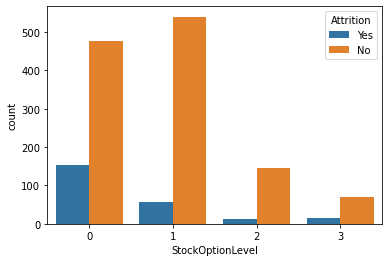

In [56]:
sns.countplot(hue=data.Attrition,x=data.StockOptionLevel)
plt.show()

In [57]:
# employee dont have stock option they leave the organization

## 5. Impact of Performance Rating on Attrition

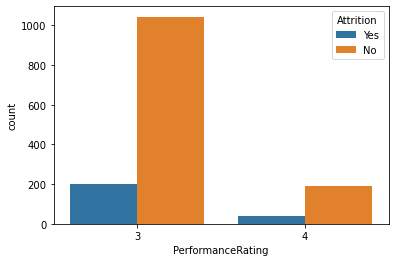

In [58]:
sns.countplot(hue=data.Attrition,x=data.PerformanceRating)
plt.show()

In [59]:
# employee has less performance rating, in this case more is attrition
# more is the performance ratinf lesser is attrtion

# Building the Machine Learning models
#1.logistic Regression
#2.Decision Tree
#3.Random Forest

##  1. Logistic Regression

In [60]:
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0


In [61]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [62]:
data.isna().sum().sum() # we dont have a null values in the data set

0

In [63]:
# checking columns the single value columns and id columns
data.drop(columns=['Over18','StandardHours'],axis=1,inplace=True)

In [64]:
data.shape

(1470, 31)

In [65]:
data.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [66]:
dataset = pd.get_dummies(data=data, drop_first=True)
dataset.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

In [68]:
dataset.rename(columns = {'Attrition_Yes' : 'Attrition'},inplace=True)

In [69]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [70]:
# splitting the dataset

x = dataset.drop(columns = ['Attrition'])
y = dataset['Attrition']

In [71]:
# divide the data in to train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=45)
len(x_train),len(x_test),len(y_train),len(y_test)

(1029, 441, 1029, 441)

In [72]:
x_train.shape

(1029, 44)

In [73]:
y_test.shape

(441,)

In [74]:
#building logistic regression model

lr = LogisticRegression(random_state=45)

# fit the model object on the training data

model_lr = lr.fit(x_train,y_train)

model_lr

LogisticRegression(random_state=45)

In [75]:
y_pred = model_lr.predict(x_test)

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [77]:
acc = accuracy_score(y_test,y_pred)

In [78]:
print(acc*100)

82.08616780045351


##  The accuracy of the regression model is 82.08%

In [79]:
confusion_matrix(y_test,y_pred)

array([[360,   2],
       [ 77,   2]], dtype=int64)

## ROC curve for logistic regression

In [80]:
from sklearn.metrics import roc_curve, auc

In [81]:
y_proba = model_lr.predict_proba(x_test)[:, 1]

In [82]:
fpr1,tpr1,thresholds = roc_curve(y_test,y_proba)

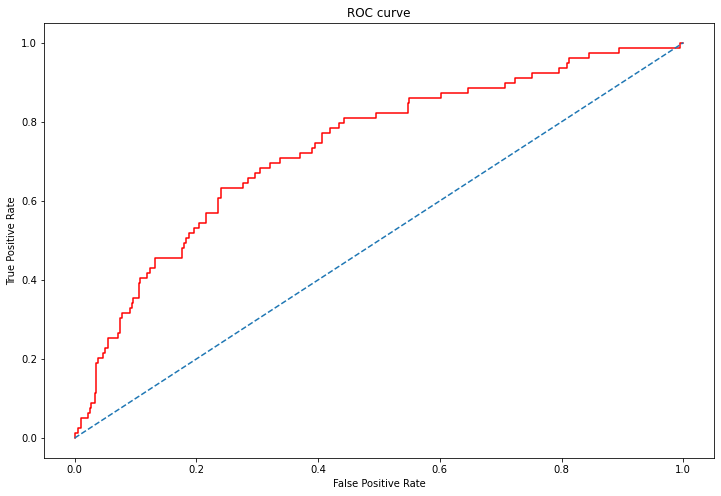

In [83]:
plt.figure(figsize=(12,8))
plt.plot(fpr1,tpr1, color='red')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

# 2. Decision Tree

In [84]:
dataset.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0


In [85]:
# our input and output variable 

x = dataset.drop(columns = ['Attrition'])
y = dataset['Attrition']

In [86]:
# divide the data in to train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=0,stratify=y)
len(x_train),len(x_test),len(y_train),len(y_test)

(1029, 441, 1029, 441)

In [87]:
x_train.shape

(1029, 44)

In [88]:
x_test.shape

(441, 44)

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=3,random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [91]:
y_pred = clf.predict(x_test)

In [92]:
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix is :', cm, sep='\n')

Confusion matrix is :
[[358  12]
 [ 56  15]]


In [93]:
acc2 = accuracy_score(y_test,y_pred)

In [94]:
print(acc2*100)

84.58049886621315


## Accuracy score for decision tree model is 84.58%

## ROC curve for Decision Tree

In [95]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

In [96]:
# generate the predicted probabilities for test data
probs = clf.predict_proba(x_test)

In [97]:
# calculate false positive,true positive rate and threshold for ROC curve
fpr2,tpr2,thresholds = roc_curve(y_test,probs[:, 1])

In [98]:
#Calculate area under the curve
roc_auc = auc(fpr2,tpr2)

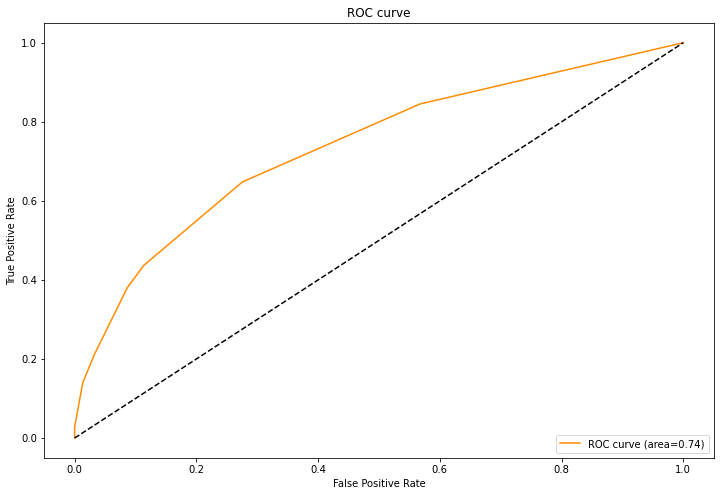

In [99]:
# plot ROC curce
plt.figure(figsize=(12,8))
plt.plot(fpr2,tpr2,label='ROC curve (area=%0.2f)' % roc_auc, color='darkorange')
plt.plot([0, 1],[0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

# 3. Random Forest 

In [100]:
# input and output variable
x = dataset.drop(columns = ['Attrition'])
y = dataset['Attrition']

In [101]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

In [102]:
rf = RandomForestClassifier(n_estimators = 25, criterion = 'entropy', random_state=0)

In [103]:
# divide the data in to train and test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=0)
len(x_train),len(x_test),len(y_train),len(y_test)

(1029, 441, 1029, 441)

In [104]:
x_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
338,30,570,5,3,4,30,2,2,3,6118,...,0,0,0,0,0,1,0,0,0,0
363,33,350,5,3,4,34,3,1,3,2851,...,0,0,0,0,0,0,1,0,1,1
759,45,788,24,4,2,36,3,1,2,2177,...,0,0,0,0,0,0,0,0,1,0
793,28,895,15,2,1,50,3,1,3,2207,...,1,0,0,0,0,0,0,0,0,0
581,30,921,1,3,4,38,1,1,3,3833,...,1,0,0,0,0,0,0,1,0,0


In [105]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=25, random_state=0)

In [106]:
rf.score(x_train,y_train)

0.9951409135082604

In [107]:
# predicting for x_test

In [108]:
pred = rf.predict(x_test)

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
acc3 = accuracy_score(y_test, pred)

In [111]:
print(acc3*100)

86.16780045351474


## The accuracy score for random forest model is 86.16

## ROC curve for random forest model

In [112]:
from sklearn.metrics import roc_curve, auc

In [113]:
# generate the predicted probabilities for test data
y_prob = rf.predict_proba(x_test)[:, 1]

In [114]:
# calculate false positive,true positive rate and threshold for ROC curve
fpr3,tpr3,thresholds = roc_curve(y_test,y_prob)

In [115]:
#Calculate area under the curve
roc_auc = auc(fpr3,tpr3)

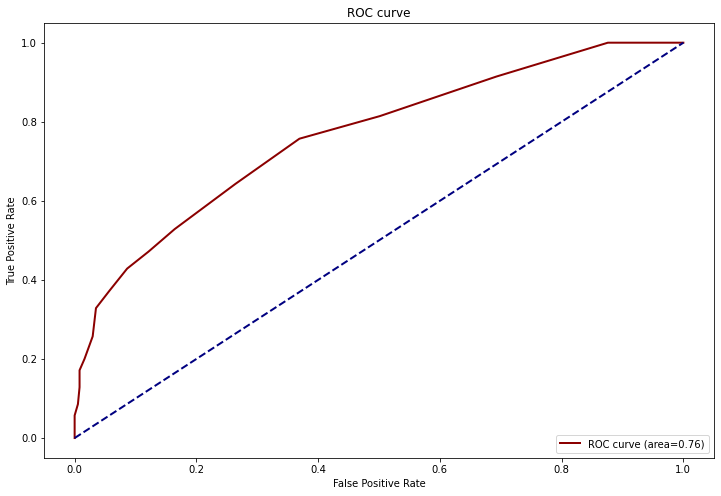

In [116]:
# plot ROC curce
plt.figure(figsize=(12,8))
plt.plot(fpr3,tpr3,color='darkred', lw=2, label='ROC curve (area=%0.2f)' % roc_auc)
plt.plot([0, 1],[0, 1],color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

In [117]:
# ROC plot is the plot between true positive rate and false positive rate
# on x axis we have false positive rate and on y axis we have true positive rate
# ROC is receiver operating characteristic and AUC is area under curve

In [118]:
# The accuracy score of Logistic Regression model is 82.08 percentage
# The accuracy score of Decision Tree model is 84.58 percentage
# The accuracy score of Random Forest model is 86.16 percentage

In [119]:
# The area under curve for the Logistic regression is 0.71
# The area under curve for the Decision Tree is 0.74
# The area under curve for the Random Forest is 0.76

# From the above information, it seems that the Random forest has a highest accuracy percentage (86.16) than the other two model,
# Also (AUC=0.76) area under curve value is greater than the other two model
# Based on the higher percentage value and Area under curve ,we conclude the Random Forest is the best model.